(-25.0, 10.0)

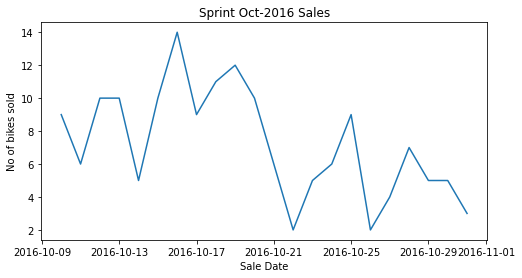

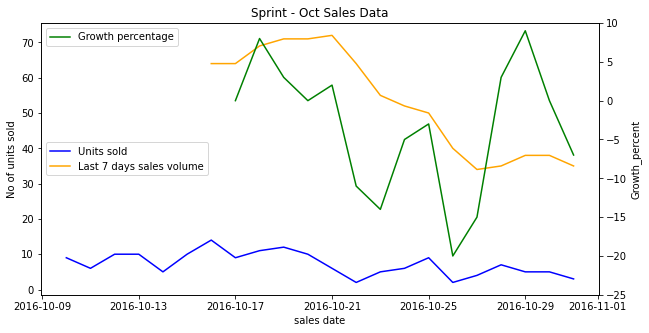

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Reading datasets
sales_A = pd.read_csv(r'C:\Users\2091077\OneDrive - Cognizant\Data Analyst_Github_proj\Project-2\drive-download-20230808T061754Z-001\EV PMX- for upload-20230519T060613Z-001\EV PMX- for upload\Work Files _ CSV\sales.csv')

sales_A

products_A = pd.read_csv(r"C:\Users\2091077\OneDrive - Cognizant\Data Analyst_Github_proj\Project-2\drive-download-20230808T061754Z-001\EV PMX- for upload-20230519T060613Z-001\EV PMX- for upload\Work Files _ CSV\products.csv")

products_A

emails_A = pd.read_csv(r"C:\Users\2091077\OneDrive - Cognizant\Data Analyst_Github_proj\Project-2\drive-download-20230808T061754Z-001\EV PMX- for upload-20230519T060613Z-001\EV PMX- for upload\Work Files _ CSV\emails.csv")

emails_A

email_subject_A = pd.read_csv(r"C:\Users\2091077\OneDrive - Cognizant\Data Analyst_Github_proj\Project-2\drive-download-20230808T061754Z-001\EV PMX- for upload-20230519T060613Z-001\EV PMX- for upload\Work Files _ CSV\email_subject.csv")

email_subject_A

#Merging all four datasets if required for future use(optional)
df = sales_A.merge(products_A,on='product_id')

df

df = df.merge(emails_A,on='customer_id')

df

df = df.merge(email_subject_A, on ='email_subject_id')

df

df.to_csv('Joined_Data.csv',index = False)


sales_A['sales_date'] = pd.to_datetime(sales_A['sales_date'],format = '%d-%m-%Y')

# Filtering Sprint model by condition product_id == 7 

sales_A_Sprint = sales_A[sales_A['product_id']==7]

# Analyzing first three weeks data
sales_graph = sales_A_Sprint[sales_A_Sprint['sales_date'].between('10-10-2016','31-10-2016')]
sales_graph
x = sales_graph.groupby('sales_date')['customer_id'].count().reset_index()['sales_date']
y =sales_graph.groupby('sales_date')['customer_id'].count().reset_index()['customer_id']
plt.figure(figsize=(8,4))
pt = plt.plot(x,y)
plt.xlabel('Sale Date')
plt.ylabel('No of bikes sold')
plt.title('Sprint Oct-2016 Sales')

# Analysis cummulative growth in first three weeks
df_sales_graph_samp = sales_graph.groupby('sales_date')['customer_id'].count().reset_index().rename(columns={'customer_id':'units_sold'})
df_sales_graph_samp['present_7days_volume']=df_sales_graph_samp['units_sold'].rolling(7,center=False).sum()
df_sales_graph_samp['last_7days_volume']=df_sales_graph_samp['present_7days_volume'].shift(1)
df_sales_graph_samp['growth_perc'] = (df_sales_graph_samp['present_7days_volume'] - df_sales_graph_samp['last_7days_volume'])*100/df_sales_graph_samp['last_7days_volume']
df_sales_graph_samp['growth_perc'] = df_sales_graph_samp['growth_perc'].apply(np.ceil)
df_sales_graph_samp=df_sales_graph_samp.assign(row_number=range(1,len(df_sales_graph_samp)+1)).rename(columns ={'row_number':'DAY'})
df_sales_graph_samp
x=df_sales_graph_samp['sales_date']
y1=df_sales_graph_samp['units_sold']
y2=df_sales_graph_samp['present_7days_volume']
y3=df_sales_graph_samp['growth_perc']
fig, ax1 = plt.subplots(figsize=(10,5))

ax2 = ax1.twinx()

ax1.plot(x,y1,'b',label = 'Units sold')
ax1.plot(x,y2,'orange',label = 'Last 7 days sales volume')
ax2.plot(x,y3,'g',label = 'Growth percentage')
ax1.set_xlabel('sales date')
ax1.set_ylabel('No of units sold')
ax2.set_ylabel('Growth_percent')
ax1.legend(loc = 6)
ax2.legend(loc=2)
ax1.set_title('Sprint - Oct Sales Data')
ax2.set_ylim([-25,10])





In [16]:
df_sales_graph_samp


,sales_date,units_sold,present_7days_volume,last_7days_volume,growth_perc,DAY
0,2016-10-10,9,NaN,NaN,NaN,1
1,2016-10-11,6,NaN,NaN,NaN,2
2,2016-10-12,10,NaN,NaN,NaN,3
3,2016-10-13,10,NaN,NaN,NaN,4
4,2016-10-14,5,NaN,NaN,NaN,5
5,2016-10-15,10,NaN,NaN,NaN,6
6,2016-10-16,14,64.0,NaN,NaN,7
7,2016-10-17,9,64.0,64.0,0.0,8
8,2016-10-18,11,69.0,64.0,8.0,9
9,2016-10-19,12,71.0,69.0,3.0,10


,sales_date,units_sold_LE,present_7days_volume_LE,last_7days_volume_LE,growth_perc_LE,DAY
0,2017-02-15,6,NaN,NaN,NaN,1
1,2017-02-16,2,NaN,NaN,NaN,2
2,2017-02-17,1,NaN,NaN,NaN,3
3,2017-02-18,4,NaN,NaN,NaN,4
4,2017-02-19,5,NaN,NaN,NaN,5
5,2017-02-20,6,NaN,NaN,NaN,6
6,2017-02-21,5,29.0,NaN,NaN,7
7,2017-02-22,4,27.0,29.0,-6.0,8
8,2017-02-23,6,31.0,27.0,15.0,9
9,2017-02-24,2,32.0,31.0,4.0,10


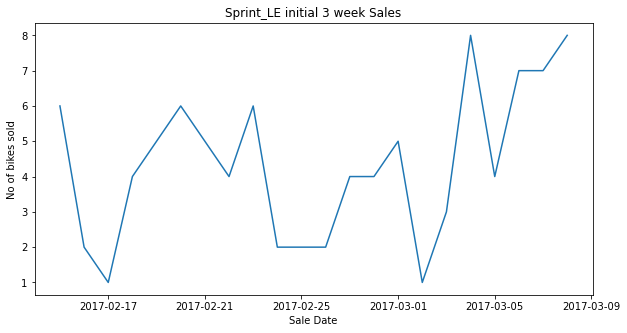

In [17]:
# Filtering Sprint_LE model by condition product_id == 8
sales_A_LE = sales_A[sales_A['product_id']==8]

# Analyzing first three weeks data
sales_graph_LE = sales_A_LE[sales_A_LE['sales_date'].between('15-02-2017','03-08-2017')]
sales_graph_LE
x = sales_graph_LE.groupby('sales_date')['customer_id'].count().reset_index()['sales_date']
y =sales_graph_LE.groupby('sales_date')['customer_id'].count().reset_index()['customer_id']
plt.figure(figsize=(10,5))
pt = plt.plot(x,y)
plt.xlabel('Sale Date')
plt.ylabel('No of bikes sold')
plt.title('Sprint_LE initial 3 week Sales')

# Analysis cummulative growth in first three weeks
df_sales_graph_samp_LE = sales_graph_LE.groupby('sales_date')['customer_id'].count().reset_index().rename(columns={'customer_id':'units_sold_LE'})
df_sales_graph_samp_LE['present_7days_volume_LE']=df_sales_graph_samp_LE['units_sold_LE'].rolling(7,center=False).sum()
df_sales_graph_samp_LE['last_7days_volume_LE']=df_sales_graph_samp_LE['present_7days_volume_LE'].shift(1)
df_sales_graph_samp_LE['growth_perc_LE'] = (df_sales_graph_samp_LE['present_7days_volume_LE'] - df_sales_graph_samp_LE['last_7days_volume_LE'])*100/df_sales_graph_samp_LE['last_7days_volume_LE']
df_sales_graph_samp_LE['growth_perc_LE'] = df_sales_graph_samp_LE['growth_perc_LE'].apply(np.ceil)
df_sales_graph_samp_LE = df_sales_graph_samp_LE.assign(row_number=range(1,len(df_sales_graph_samp_LE)+1)).rename(columns ={'row_number':'DAY'})
df_sales_graph_samp_LE


Text(0.5, 1.0, 'Sprint vs Sprint_LE')

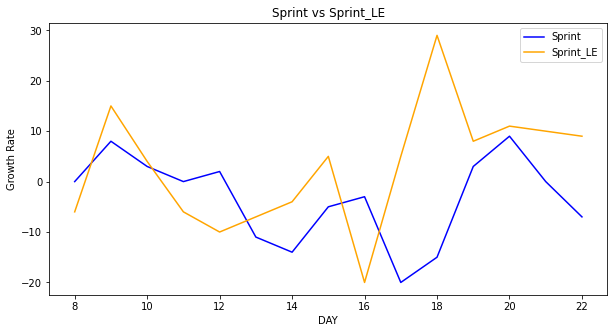

In [18]:
#Merging Sprint and Sprint_LE dataframes to compare the growth relation

release_date_compare_data =df_sales_graph_samp.merge(df_sales_graph_samp_LE,on='DAY')[['DAY','units_sold','units_sold_LE','present_7days_volume','present_7days_volume_LE','last_7days_volume','last_7days_volume_LE','growth_perc','growth_perc_LE']]
release_date_compare_data

#Plotting to compare growth rate bw Sprint and LE
x=release_date_compare_data['DAY']
y1=release_date_compare_data['growth_perc']
y2=release_date_compare_data['growth_perc_LE']
fig, ax1 = plt.subplots(figsize=(10,5))
ax1.plot(x,y1,'b',label = 'Sprint')
ax1.plot(x,y2,'orange',label = 'Sprint_LE')
ax1.legend()
ax1.set_xlabel('DAY')
ax1.set_ylabel('Growth Rate')
ax1.set_title('Sprint vs Sprint_LE')



In [19]:
# Email Summary for Sprint Campaign
emails_A = emails_A[emails_A['email_subject_id']==7]  #Filtering emails related to Sprint
open_c = emails_A['opened'].value_counts().reset_index()
email_sent_c = emails_A['email_id'].count()
click_c = emails_A['clicked'].value_counts().reset_index()
bounced_c = emails_A['bounced'].value_counts().reset_index() 
open_c = open_c[open_c['index']=='t'].iat[0,-1]
click_c = click_c[click_c['index']=='t'].iat[0,-1]
bounced_c = bounced_c[bounced_c['index']=='t'].iat[0,-1]
values = [email_sent_c,open_c,click_c,bounced_c]
labels = ['Emails Sent','Emails opened','Links Clicked','Emails Bounced']


c1 = pd.Series(values,labels)
c1 = c1.to_frame(name='values').reset_index().rename(columns = {'index':'particulars'})
c1

,particulars,values
0,Emails Sent,35067
1,Emails opened,6995
2,Links Clicked,848
3,Emails Bounced,125


In [20]:
#KPI summary for Sprint email campaign
clicked_rate = c1[c1['particulars']=='Links Clicked'].iat[0,-1]*100/(c1[c1['particulars']=='Emails Sent'].iat[0,-1] - c1[c1['particulars']=='Emails Bounced'].iat[0,-1])
clicked_rate
opened_rate = c1[c1['particulars']=='Emails opened'].iat[0,-1]*100/(c1[c1['particulars']=='Emails Sent'].iat[0,-1] - c1[c1['particulars']=='Emails Bounced'].iat[0,-1])
opened_rate
values = [clicked_rate,opened_rate]
labels = ['clicked_rate','opened_rate']
kpis = [8,18]
c2 = pd.Series(values,labels)
c2 = c2.to_frame(name = 'Percentage value').reset_index().rename(columns = {'index':'KPI'})
c2
c3 = pd.Series(kpis,labels)
c3 = c3.to_frame(name = 'Benchmark KPIs').reset_index().rename(columns = {'index':'KPI'})
c2 = c2.merge(c3,on ='KPI')
c2

,KPI,Percentage value,Benchmark KPIs
0,clicked_rate,2.426879,8
1,opened_rate,20.018888,18
